## Having fun with Numbers

First, let's try **Collatz conjecture**, as it always sound fun.<br>
It starts with any integer and then goes through steps below and repeats itself.<br>

        If number is even, it is divided by 2
        If number is odd, it is multiplied by 3 and adding 1

Magic thing is that it always ends in 1.
Let's see how many steps it takes.

In [1]:
#Creating the function

def Collatz(n):
    step_count = 0
    while n != 1:
        if n % 2 ==0: n/=2
        else:
            n *= 3
            n += 1
        step_count+=1
    print ('It took {} steps to get to 1'.format(str(step_count)))
    return step_count

In [2]:
Collatz(4857239856234562348526349852658433)

It took 381 steps to get to 1


381

But what are the results good for, if we can't **visualize** them? <br>
Let's use plotlib to map out steps needed for the first 1000 integers

In [2]:
#Generating the data
def Collatz(n):
    step_count = 0
    while n != 1:
        if n % 2 ==0: n/=2
        else:
            n *= 3
            n += 1
        step_count+=1
    return step_count
x = []
y = []

for i in range(1,1001):
    x.append(i)
    y.append(Collatz(i))

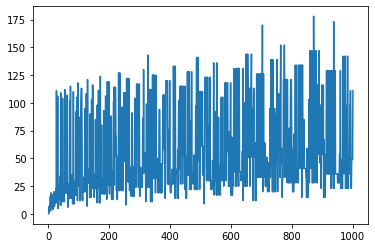

In [3]:
import matplotlib.pyplot as plt

plt.plot(x, y)


The data is not that visible, let's zoom in on first hundred and see if helps.

(0.0, 100.0, 0.0, 125.0)

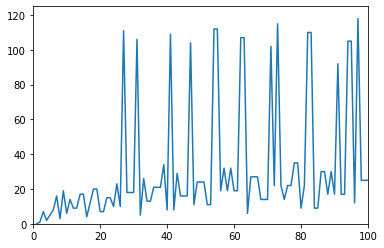

In [5]:
plt.plot(x, y)
plt.axis([0, 100,0, 125])


It seems that there's certain repeatable form to the numbers, but peaks are obcsuring the visual. <br>
Let's remove the peaks and see if it will show the data better. <br>
Visuially it seems that peaks are aggregated higher then 80. <br>
Of course, let's collect peaks in separate list, as there's no waste in well-run household.

In [17]:
def removing_peaks(y,peak): 
    '''Takes in Y series and peak, returns 2 lists with peaks removed and their coordinates and 2 lists of peaks and their coordinates'''
    x_peaks = []
    y_peaks = []
    x_new = []
    y_new = []
    count = -1
    for i, element in enumerate(y):
        count+=1
        if element>=peak:
            x_peaks.append(i)
            y_peaks.append(element)
        else:
            x_new.append(i)
            y_new.append(element)
    return(x_new,y_new,x_peaks,y_peaks)
    


In [18]:
x, y, x_peaks, y_peaks = removing_peaks(y,80)

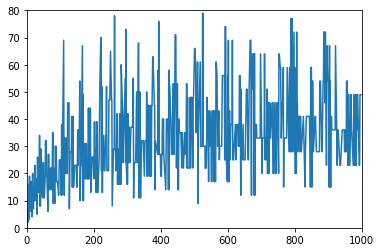

In [23]:
#Let's see the visual now
plt.axis([0, 1000,0, 80])
plt.plot(x, y)


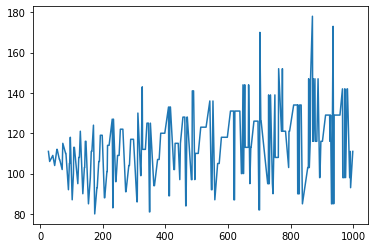

In [21]:
# And what about the peaks?
plt.plot(x_peaks, y_peaks)


Repeatable pattern was an illusion, nothing too interesting to see with this represenation. <br>
Maybe frequency of the steps will be visually pleasing?

In [4]:
#Lets re-generate the set
x = []
y = []

for i in range(1,1001):
    x.append(i)
    y.append(Collatz(i))

In [8]:
# Now to get frequency for each of the values
#firts, make a unique set of values
step_set = set(y)

#then, let's create dictionary for values and their quantity
step_dict = {}
for element in step_set:
    step_dict[element] = 0

#next thing - actually counting the quantity
for element in y:
    step_dict[element] +=1

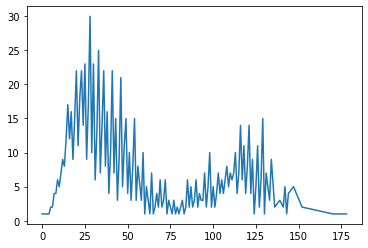

In [15]:
#And now let's visualize that again

plt.plot(step_dict.keys(), step_dict.values())